In [1]:
%pip install -r ../requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_models():    
    with open('../models/modelv2.pkl', 'rb') as model_file:
        model = joblib.load(model_file)

    # Carregar o vectorizer
    with open('../models/vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = joblib.load(vectorizer_file)
    return model,vectorizer

In [4]:
def predict(text):
    model, vectorizer = load_models()

    X = vectorizer.transform([text])

    if hasattr(X, "toarray"):  # Verifica se o método 'toarray' exist
        X = X.toarray()

    prediction = model.predict(X)
    return prediction


In [5]:
test = pd.read_csv('../results/test.csv')

In [6]:
test.head()

,text,label,clean_text,prompt
0,""" What's wrong with the Electoral College?"" To...",0,I write this letter in favor to inform you tha...,NaN
1,"Hey, guys! So, for this essay, I had to resear...",1,"So, basically, praise is like this super power...",NaN
2,Seeking multiple opinions when asking for advi...,1,"Secondly, discussing your dilemma with more th...","When people ask for advice, they sometimes tal..."
3,That some schools offer the option for student...,0,Online classes. This is one of the option for ...,Task: \n\n1. Research the advantages and disad...
4,Some people may view car limitations as bad or...,0,Pollution is a major problem in big cities lik...,NaN


In [7]:
predictions = []
train_data = test[:5000]
for text in train_data['clean_text']:
    predictions.append(predict(text))

2025-01-26 17:09:47.486047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737922187.546225    6147 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737922187.567520    6147 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 17:09:47.712640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-26 17:09:49.815009: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

In [8]:
comparision_data = train_data[:5000]
comparision_data["predictions"] = predictions

/tmp/ipykernel_6147/692442626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparision_data["predictions"] = predictions


In [9]:
comparision_data.head()

,text,label,clean_text,prompt,predictions
0,""" What's wrong with the Electoral College?"" To...",0,I write this letter in favor to inform you tha...,NaN,[[1.2609531e-13]]
1,"Hey, guys! So, for this essay, I had to resear...",1,"So, basically, praise is like this super power...",NaN,[[1.0]]
2,Seeking multiple opinions when asking for advi...,1,"Secondly, discussing your dilemma with more th...","When people ask for advice, they sometimes tal...",[[1.0]]
3,That some schools offer the option for student...,0,Online classes. This is one of the option for ...,Task: \n\n1. Research the advantages and disad...,[[2.666008e-07]]
4,Some people may view car limitations as bad or...,0,Pollution is a major problem in big cities lik...,NaN,[[2.0473595e-11]]


In [10]:
comparision_data['predictions'] = comparision_data['predictions'].apply(lambda x: x[0][0])
predictions = comparision_data.drop(["text","prompt","clean_text"], axis=1)

/tmp/ipykernel_6147/3558253151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparision_data['predictions'] = comparision_data['predictions'].apply(lambda x: x[0][0])


In [11]:
# Definir classes previstas com base no limiar de 0.5
threshold = 0.5
predictions['predicted_class'] = (predictions['predictions'] >= threshold).astype(int)

# Calcular métricas
accuracy = accuracy_score(predictions['label'], predictions['predicted_class'])
roc_auc = roc_auc_score(predictions['label'], predictions['predictions'])
conf_matrix = confusion_matrix(predictions['label'], predictions['predicted_class'])
report = classification_report(predictions['label'], predictions['predicted_class'], target_names=['Classe 0', 'Classe 1'])

# Imprimir métricas
print("Acurácia:", accuracy)
print("ROC AUC:", roc_auc)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", report)

Acurácia: 0.9857288481141692
ROC AUC: 0.9987376590920299
F1-Score: 0.9811625403659849
Matriz de Confusão:
 [[3012   55]
 [  15 1823]]
Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       1.00      0.98      0.99      3067
    Classe 1       0.97      0.99      0.98      1838

    accuracy                           0.99      4905
   macro avg       0.98      0.99      0.98      4905
weighted avg       0.99      0.99      0.99      4905



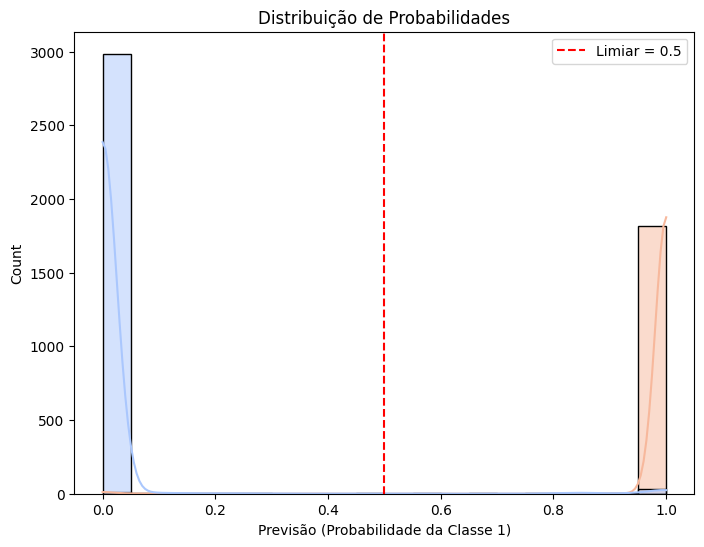

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=predictions, x='predictions', hue='label', kde=True, bins=20, palette='coolwarm')
plt.axvline(threshold, color='red', linestyle='--', label=f"Limiar = {threshold}")
plt.title("Distribuição de Probabilidades")
plt.xlabel("Previsão (Probabilidade da Classe 1)")
plt.legend()
plt.show()

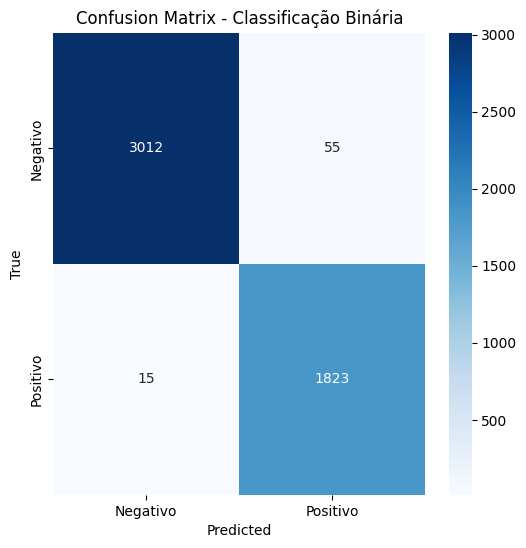

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Classificação Binária')
plt.show()